# Advertising Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

## Import Libraries

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

## Data

In [4]:
df=pd.read_csv('advertising.csv')

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
type(df['Timestamp'].iloc[0])

str

In [9]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

## Exploratory Data Analysis

C:\Users\richa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\richa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


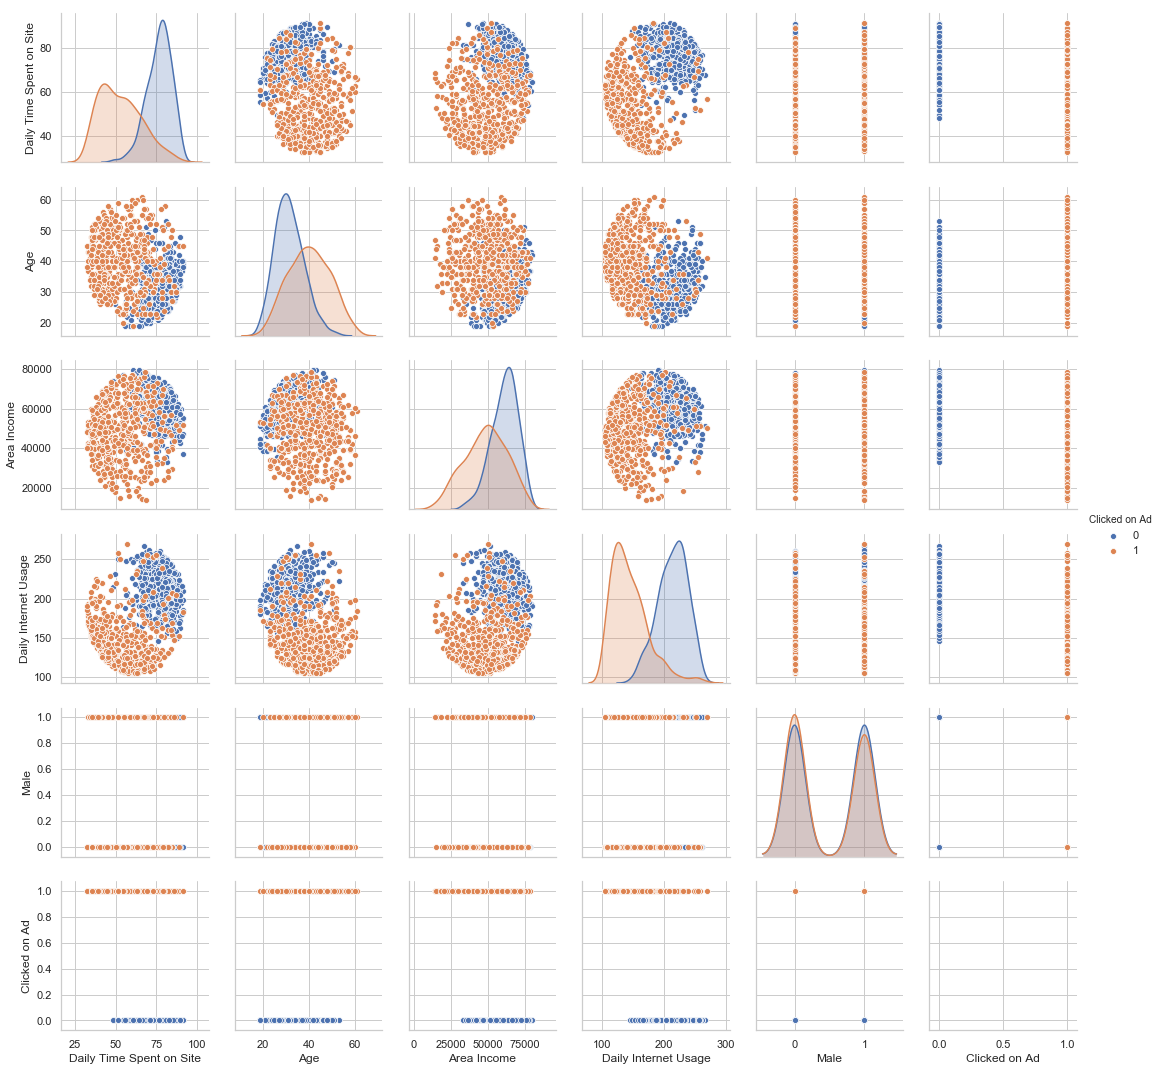

In [24]:
sns.pairplot(data=df, hue='Clicked on Ad')

Text(0.5,1,'Age Distribution of Users')

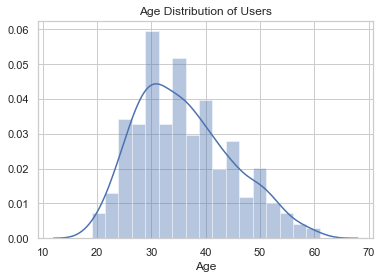

In [27]:
ax=plt.axes()
sns.distplot(df['Age'], ax=ax)
ax.set_title('Age Distribution of Users')

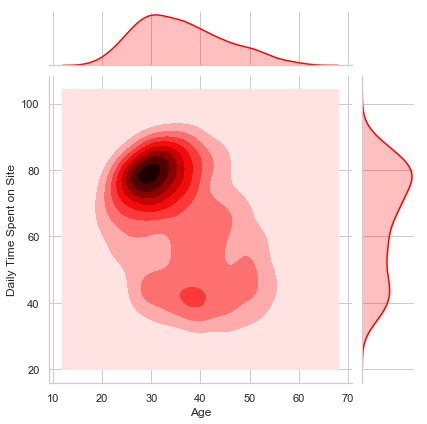

In [32]:
sns.jointplot(data=df, x='Age', y='Daily Time Spent on Site', kind='kde', color='red')

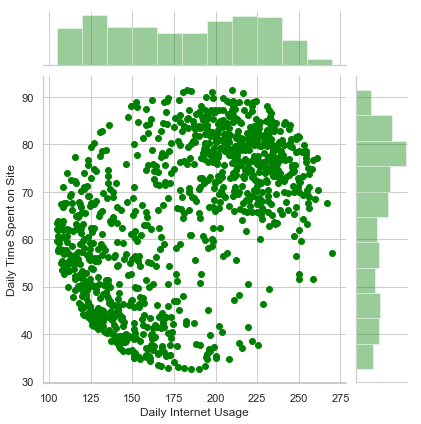

In [33]:
sns.jointplot(data=df, x= 'Daily Internet Usage', y='Daily Time Spent on Site', color='green')

Based on the data exploration made above, the largest contributers for a user to click on an ad is lack of time spent on the internet, lack of time spent on the website, and increase in age.

## Data Clean Up

Text(0.5,1,'Error Heatmap')

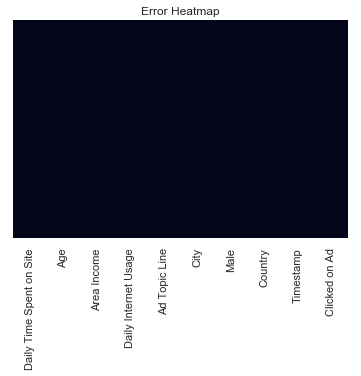

In [34]:
ax=plt.axes()
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, ax=ax)
ax.set_title('Error Heatmap')

In [36]:
df.isnull().values.any()

False

## Machine Learning - Logistic Regression

### Training and Test Data

In [37]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [38]:
X=df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y=df['Clicked on Ad']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
lm=LogisticRegression()

In [45]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
print(lm.coef_)

[[-4.45816498e-02  2.18379839e-01 -7.63621393e-06 -2.45264007e-02
   1.13334440e-03]]


In [61]:
lm.coef_.squeeze()

array([-4.45816498e-02,  2.18379839e-01, -7.63621393e-06, -2.45264007e-02,
        1.13334440e-03])

In [53]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [63]:
coef_lt=pd.DataFrame(lm.coef_.squeeze(), index=X.columns, columns=['Coefficients'])
coef_lt

,Coefficients
Daily Time Spent on Site,-0.044582
Age,0.218380
Area Income,-0.000008
Daily Internet Usage,-0.024526
Male,0.001133


## Predictions & Evaluations

In [64]:
predictions=lm.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300

